# Phonon mode analysis in theta-space
The dataset generated by `twist_ph.py` in theta-space mode is a matrix of phonon modes at a certain k-point over a sampled set of twist angles. This notebook shows a visualization of these modes for each k-point.

In [11]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

## MoS2-0

In [12]:
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvMoS2"
THSPC_DIR = "theta"

# Change as necessary
M1_th_min, M1_th_max, M1_ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
M1_ntheta = int(M1_ntheta)
KPT = 'Gamma'
print(f"{M1_ntheta} angles from {M1_th_min} to {M1_th_max}")

# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_modes.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
M1_dataset = np.load(path)
M1_nmodes = M1_dataset.shape[1]
print("Dataset shape:", M1_dataset.shape)
print("Number of modes:", M1_nmodes)
M1_thetas = np.linspace(M1_th_min, M1_th_max, M1_ntheta)

101 angles from 0.01 to 10.0
Dataset shape: (101, 61)
Number of modes: 61


In [13]:
# Find indices of key modes, manually
M1_LB1_idxs = np.zeros(M1_ntheta).astype(int)
M1_LB1_idxs[73:] = 5
M1_LB1_idxs[25:73] = 11
M1_LB1_idxs[10:25] = 17
M1_LB1_idxs[5:10] = 23
M1_LB1_idxs[:5] = 25

M1_LB2_idxs = np.zeros(M1_ntheta).astype(int)
M1_LB2_idxs[73:] = 23
M1_LB2_idxs[25:73] = 29

M1_S_idxs = np.zeros(M1_ntheta).astype(int)
M1_S_idxs[77:] = 4
M1_S_idxs[10:77] = 1
M1_S_idxs[7:10] = 16
M1_S_idxs[:7] = 21
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_idxs.npy', M1_LB1_idxs)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_S_idxs.npy', M1_S_idxs)

# Extract the mode list from the indices
M1_LB1_modes = np.zeros(M1_ntheta)
M1_S_modes = np.zeros(M1_ntheta)

for i in range(M1_ntheta):
    M1_LB1_modes[i] = M1_dataset[i, M1_LB1_idxs[i]]
    M1_S_modes[i] = M1_dataset[i, M1_S_idxs[i]]
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_modes.npy', M1_LB1_modes)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_S_modes.npy', M1_S_modes)

## Gr

In [14]:
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvGr"
THSPC_DIR = "theta"

# Change as necessary
M2_th_min, M2_th_max, M2_ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
M2_ntheta = int(M2_ntheta)
KPT = 'Gamma'
print(f"{M2_ntheta} angles from {M2_th_min} to {M2_th_max}")

# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_modes.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
M2_dataset = np.load(path)
M2_nmodes = M2_dataset.shape[1]
print("Dataset shape:", M2_dataset.shape)
print("Number of modes:", M2_nmodes)
M2_thetas = np.linspace(M2_th_min, M2_th_max, M2_ntheta)

101 angles from 0.01 to 10.0
Dataset shape: (101, 61)
Number of modes: 61


In [15]:
# Find indices of key modes, manually 
M2_LB1_idxs = np.zeros(M2_ntheta).astype(int)
M2_LB1_idxs[92:] = 5
M2_LB1_idxs[12:92] = 11
M2_LB1_idxs[4:12] = 17
M2_LB1_idxs[:4] = 23

M2_LB2_idxs = np.zeros(M2_ntheta).astype(int)
M2_LB2_idxs[73:] = 23
M2_LB2_idxs[25:73] = 29

M2_S_idxs = np.zeros(M2_ntheta).astype(int)
M2_S_idxs[42:] = 4
M2_S_idxs[5:42] = 1
M2_S_idxs[3:5] = 10
M2_S_idxs[:3] = 22
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_LB1_idxs.npy', M2_LB1_idxs)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_S_idxs.npy', M2_S_idxs)

# Extract the mode list from the indices
M2_LB1_modes = np.zeros(M2_ntheta)
M2_S_modes = np.zeros(M2_ntheta)

for i in range(M2_ntheta):
    M2_LB1_modes[i] = M2_dataset[i, M2_LB1_idxs[i]]
    M2_S_modes[i] = M2_dataset[i, M2_S_idxs[i]]

np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_LB1_modes.npy', M2_LB1_modes)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_S_modes.npy', M2_S_modes)

## MoSe2-WSe2

In [16]:
DIRNAME = "tvHet"

# Change as necessary
M3_th_min, M3_th_max, M3_ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
M3_ntheta = int(M3_ntheta)
KPT = 'Gamma'
print(f"{M3_ntheta} angles from {M3_th_min} to {M3_th_max}")

# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_modes.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
M3_dataset = np.load(path)
M3_nmodes = M3_dataset.shape[1]
print("Dataset shape:", M3_dataset.shape)
print("Number of modes:", M3_nmodes)
M3_thetas = np.linspace(M3_th_min, M3_th_max, M3_ntheta)

101 angles from 0.01 to 10.0
Dataset shape: (101, 61)
Number of modes: 61


In [18]:
# Find indices of key modes, manually 
M3_LB1_idxs = np.zeros(M3_ntheta).astype(int)
M3_LB1_idxs[83:] = 5
M3_LB1_idxs[21:83] = 11
M3_LB1_idxs[14:21] = 17
M3_LB1_idxs[1:14] = 23
M3_LB1_idxs[0:1] = 25

M3_LB2_idxs = np.zeros(M3_ntheta).astype(int)
M3_LB2_idxs[73:] = 23
M3_LB2_idxs[25:73] = 29

M3_S_idxs = np.zeros(M3_ntheta).astype(int)
M3_S_idxs[42:] = 4
M3_S_idxs[5:42] = 1
M3_S_idxs[3:5] = 10
M3_S_idxs[:3] = 22
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Het_LB1_idxs.npy', M3_LB1_idxs)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Het_S_idxs.npy', M3_S_idxs)

# Extract the mode list from the indices
M3_LB1_modes = np.zeros(M3_ntheta)
M3_S_modes = np.zeros(M3_ntheta)

for i in range(M3_ntheta):
    M3_LB1_modes[i] = M3_dataset[i, M3_LB1_idxs[i]]
    M3_S_modes[i] = M3_dataset[i, M3_S_idxs[i]]

np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Het_LB1_modes.npy', M3_LB1_modes)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Het_S_modes.npy', M3_S_modes)

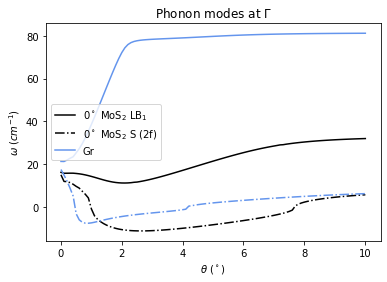

In [21]:
# MoS2-0
plt.plot(M1_thetas[0:], M1_LB1_modes[0:], c='k', label=r'$0^\circ$ MoS$_2$ LB$_1$')
plt.plot(M1_thetas[0:], M1_S_modes[0:], c='k', label=r'$0^\circ$ MoS$_2$ S (2f)', linestyle='dashdot')

# Gr
plt.plot(M2_thetas[0:], M2_LB1_modes[0:], c='cornflowerblue', label=r'Gr')
plt.plot(M2_thetas[0:], M2_S_modes[0:], c='cornflowerblue', linestyle='dashdot')

# MoSe2-WSe2

# MoS2-180

# Cosmetics
plt.title(f"Phonon modes at " + log_name)
plt.xlabel(r'$\theta$ ($^\circ$)')
plt.ylabel(r'$\omega$ $(cm^{-1})$')
plt.legend()
plt.savefig("/Users/jonathanlu/Documents/data_mlph/modes/modes.pdf")
plt.show()